# Comparing Stars Between Files using the `sdss_id`

## Learning Goals
By the end of this tutorial, you will:
- Know how to identify the same objects from two different `astra` data products

## Introduction
Unique astronomical objects in SDSS-V are kept track of using the `sdss_id`. This identifier was created in order to combine the several crossmatch versions that have been completed during the ongoing survey and is a useful tool to compare the same objects from different files.

Let's say we want to match results from two different pipelines: `LineForest` and `ASPCAP`. As an example problem, we will look at the iron abundances from stars observed with APOGEE and their H alpha equivalent width in BOSS.

## Imports
This tutorial requires three commonly used python packages
- _numpy_ for doing large array operations
- _matplotlib_ for plotting
- _astropy_ for reading fits table

Missing packages can be installed via `pip install numpy matplotlib astropy`

In [1]:
#Imports
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

# Filter warnings (I only do this to make the notebook look nice)
import warnings
warnings.filterwarnings("ignore")

If running this notebook on your computer, two files need to be downloaded. Both can be found at https://data.sdss.org/sas/dr19/spectro/astra/0.6.0/summary/

If you are running this notebook on SciServer, these files are already available at the path defined below. Otherwise you will need to set local path appropriately for your computer.

In [ ]:
LF_filename = 'astraAllStarLineForest-0.6.0.fits.gz'
AC_filename = 'astraAllStarASPCAP-0.6.0.fits.gz'
localpath = '/home/idies/workspace/sdss_sas/dr19/spectro/astra/0.6.0/summary/'

# Open LineForest
hdul_LF = fits.open(localpath + LF_filename)

# Store the data
boss_lineforest = hdul_LF[1].data


# Do the same for ASPCAP
hdul_AC = fits.open(localpath + AC_filename)
apogee_aspcap = hdul_AC[2].data

This might take a moment to open the large files. 

It is not easy to convert large astropy fits objects into more digestible data types because they use a lot of RAM (i.e. _astropy_ `Tables` or _pandas_ `DataFrames`). So, let's first find out what `sdss_ids` overlap between the two tables first and then convert later. A good tool for this is _numpy_'s `isin` routine, which returns a boolean array of whether the row is in another list.

In [3]:
# Get sdss_ids
boss_sdss_id = boss_lineforest["sdss_id"]
apog_sdss_id = apogee_aspcap["sdss_id"]

# Check if they are in the other catalog
boss_in_apog = np.isin(boss_sdss_id, apog_sdss_id)
apog_in_boss = np.isin(apog_sdss_id, boss_sdss_id)

print("There are %s LineForest rows in ASPCAP"%(np.sum(boss_in_apog)))
print("There are %s ASPCAP rows in LineForest"%(np.sum(apog_in_boss)))

There are 22844 LineForest rows in ASPCAP
There are 24401 ASPCAP rows in LineForest


Now we have the rows which overlap between the two catalogs. The numbers are different because there may be duplicated rows in one of the tables.

Let's turn these into pandas DataFrames

In [4]:
# You can filter out the rows which don't match by passing it inside brackets
boss_lineforest_match = boss_lineforest[boss_in_apog]
apogee_aspcap_match = apogee_aspcap[apog_in_boss]

# Turn the fits object into an astropy Table
bl = Table(boss_lineforest_match)
# Find the columns which are 1D arrays
bl_names = [name for name in bl.colnames if len(bl[name].shape) <= 1]
# Turn the Table into pandas DataFrame
bl = bl[bl_names].to_pandas()

# Do the same for ASPCAP
aa = Table(apogee_aspcap_match)
aa_names = [name for name in aa.colnames if len(aa[name].shape) <= 1]
aa = aa[aa_names].to_pandas()

Now these should tables should be easier to work with! But note that removing the multi-dimensional data will get rid of the `SDSS5_TARGET_FLAGS` column.

In [5]:
bl

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,detection_stat_o_iii_5006,detection_raw_o_iii_5006,eqw_o_iii_4363,abs_o_iii_4363,detection_stat_o_iii_4363,detection_raw_o_iii_4363,eqw_li_i,abs_li_i,detection_stat_li_i,detection_raw_li_i
0,57986213,2M08202754+5039092,932171180709544960,932171180709544960,309663324,22407,gaia_dr3_source,31,63050394828054999,4358936662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55054210,2M03400877+6322565,486950545777258496,486950545777258496,392377595,10556,gaia_dr3_source,31,63050394800032784,4323784458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57304881,2M11351508+5235385,840242873232663040,840242873232663040,136949082,19993,gaia_dr3_source,31,63050394824117131,4360324764,...,1.0001,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79731650,2M11122553-0105412,3791857442582709504,3791857442582709504,443586370,99823,gaia_dr3_source,31,63050395169824115,4574381834,...,0.9998,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77372043,,3408645891905572096,3408645891905572096,68750781,63850,tic_v8,25,27021598058120469,4500358902,...,0.9933,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,60304544,2M14593880+4023228,1296900765557720448,1296900765557720448,28347895,34368,gaia_dr3_source,31,63050394842772097,4350559881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22840,61651404,2M13544903+3945037,1497043222189724416,1497043222191647872,23753266,35369,gaia_dr3_source,31,63050394850037390,4603684880,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0243,4.5689,1.0016,0.91
22841,88884090,2M15172043-0205307,4415089804623854080,4415089804623854080,38947570,101958,gaia_dr3_source,31,63050395714873724,4776536612,...,0.9995,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22842,88884180,2M15172179-0154585,4415105369585406464,4415105369585406464,38947519,101958,gaia_dr3_source,31,63050395714874342,4776539852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next thing we can do is to combine both tables together using pandas' `merge` routine. In this routine, `left_on` and `right_on` tell `merge` which column to join the tables together on. The suffixes are added to columns which exist in both tables. You can make one of the suffixes an empty string (`""`) because the meta information will be the same in both tables. 

In [6]:
both = pd.merge(bl, aa, left_on="sdss_id", right_on="sdss_id", suffixes=["", "_aa"])

both

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_si_h,raw_e_si_h,raw_s_h,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h
0,57986213,2M08202754+5039092,932171180709544960,932171180709544960,309663324,22407,gaia_dr3_source,31,63050394828054999,4358936662,...,-0.100591,0.009673,0.002239,0.009768,-0.058738,0.009695,NaN,NaN,-0.049559,0.005419
1,55054210,2M03400877+6322565,486950545777258496,486950545777258496,392377595,10556,gaia_dr3_source,31,63050394800032784,4323784458,...,-0.014422,0.003437,0.042457,0.003482,0.076718,0.003506,NaN,NaN,-0.597890,0.001641
2,57304881,2M11351508+5235385,840242873232663040,840242873232663040,136949082,19993,gaia_dr3_source,31,63050394824117131,4360324764,...,-0.136189,0.005951,-0.273327,0.005960,-0.221767,0.005957,NaN,NaN,-0.107470,0.002280
3,57304881,2M11351508+5235385,840242873232663040,840242873232663040,136949082,19993,gaia_dr3_source,31,63050394824117131,4360324764,...,-0.169689,0.006525,-0.098582,0.006561,-0.232714,0.006534,NaN,NaN,-0.111020,0.002291
4,79731650,2M11122553-0105412,3791857442582709504,3791857442582709504,443586370,99823,gaia_dr3_source,31,63050395169824115,4574381834,...,-0.585630,0.019964,-0.433420,0.019709,-0.540410,0.019891,NaN,NaN,-0.689840,0.006184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24396,61651404,2M13544903+3945037,1497043222189724416,1497043222191647872,23753266,35369,gaia_dr3_source,31,63050394850037390,4603684880,...,-0.237625,0.003829,-0.267783,0.003846,-0.161970,0.003790,NaN,NaN,0.185250,0.001094
24397,61651404,2M13544903+3945037,1497043222189724416,1497043222191647872,23753266,35369,gaia_dr3_source,31,63050394850037390,4603684880,...,-0.201363,0.001790,-0.213379,0.001794,-0.273590,0.001812,NaN,NaN,0.157380,0.000519
24398,88884090,2M15172043-0205307,4415089804623854080,4415089804623854080,38947570,101958,gaia_dr3_source,31,63050395714873724,4776536612,...,-1.121680,0.015180,-1.134650,0.015205,-1.399291,0.015670,NaN,NaN,-1.348100,0.005723
24399,88884180,2M15172179-0154585,4415105369585406464,4415105369585406464,38947519,101958,gaia_dr3_source,31,63050395714874342,4776539852,...,-0.421730,0.007830,-0.284790,0.007704,-0.454750,0.007857,NaN,NaN,0.149800,0.002112


We now have a table with information from both ASPCAP and LineForest. Let's do some fun plotting to see what we've found 

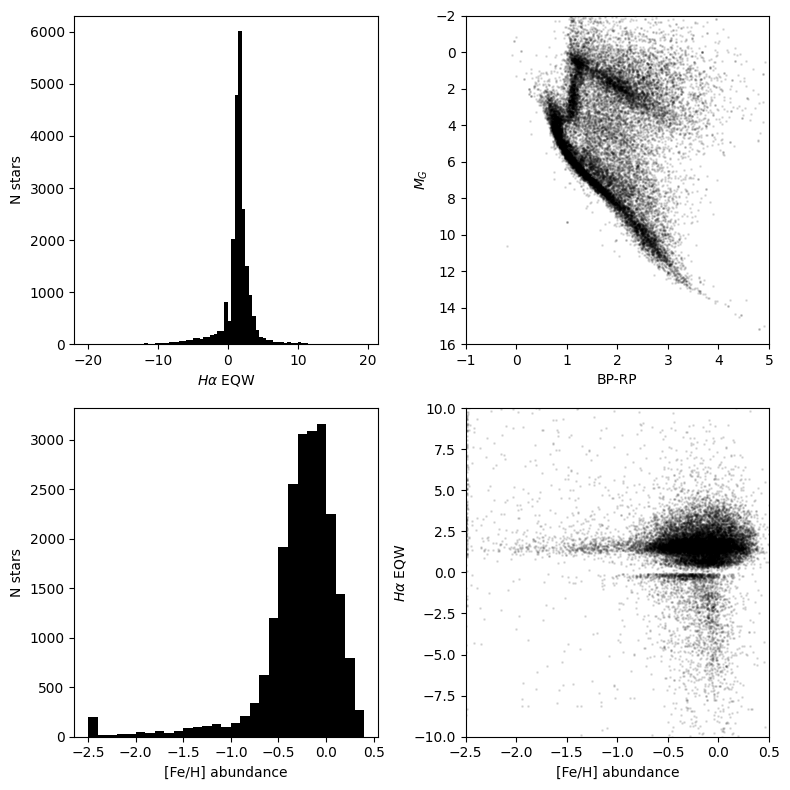

In [7]:
# Make Figure
fig = plt.figure(figsize=(8,8), facecolor="white")

# Make Histogram of H alpha
ax0 = plt.subplot(221)
ax0.hist(both["eqw_h_alpha"], bins=np.arange(-20,20, 0.5),
         color="black", label=r"$H\alpha$ Emission")
ax0.set(xlabel=r"$H \alpha$ EQW", ylabel="N stars")

# Make HR Diagram
ax1 = plt.subplot(222)
ax1.scatter(both["bp_mag"]-both["rp_mag"],
            both["g_mag"]+5*np.log10(both["plx"]/100),
            s=1, color="black", alpha=0.1)
ax1.set(xlabel="BP-RP", ylabel=r"$M_G$", xlim=(-1,5), ylim=(16,-2))

# Make Histogram of [Fe/H]
ax2 = plt.subplot(223)
ax2.hist(both["fe_h"], bins=np.arange(-2.5,0.5, 0.1),
         color="black", label=r"[Fe/H] abundance")
ax2.set(xlabel=r"[Fe/H] abundance", ylabel="N stars")

# Make HR Diagram
ax3 = plt.subplot(224)
ax3.scatter(both["fe_h"], both["eqw_h_alpha"],
            s=1, color="black", alpha=0.1)
ax3.set(xlabel=r"[Fe/H] abundance", ylabel=r"$H \alpha$ EQW", 
        xlim=(-2.5,0.5), ylim=(-10,10))

plt.tight_layout()
plt.show()

Unfortunately, there doesn't seem to be much of a correlation between H alpha emission and iron abundance. But, there are quite a few stars with both BOSS and APOGEE spectra!

### About this notebook

This notebook was created to illustrate how to find the same targets that exist in two different tables.

**Authors**: Zach Way

**Last Update**: 2024 December 10

If you use `astropy`  for published research, please cite the
authors. Follow this link for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

And of course please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data.